<a href="https://colab.research.google.com/github/AryaAkhil/Image-Classifiation-Shapes-/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview:**

This notebook aims to showcase use of fastai for state of the art image classification on shapes dataset obtained through kaggle.

**Data Source:**

https://www.kaggle.com/cactus3/basicshapes

**Install Packages**

In [ ]:
!pip install fastai --upgrade -q

**Import Packages**

In [ ]:
from fastai.vision.all import *

**Mount Google Drive to Colab**

This is important step in order to insure you are able to fetch data from your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


**Set Working Directory**

In [ ]:
root_dir = "/content/gdrive/MyDrive/Colab_Notebooks/"
base_dir = root_dir + 'Image_classification'
path=Path(base_dir)
!ls {path}

**Create Data Block**

It is used for transforming raw data (e.g., in image files, .csv files, pandas DataFrames, etc.) into the requisite PyTorch Datasets and Dataloaders that are fed into the forwardfunction of Neural network. Here, "ImageBlock" transforms the image data stored in separate folders in your gdrive. In this case, squares, triangles and circles. And "CategoryBlock" transforms the folder names as category labels as target feature. For more details refer to the documentation and a detailed article from Wayde Gilliam:
1. https://docs.fast.ai/data.block.html

2. https://blog.usejournal.com/finding-data-block-nirvana-a-journey-through-the-fastai-data-block-api-c38210537fe4


In [ ]:
shapes = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

**Load Data**

Its fuctionality is pretty intuitive although in case of doubts please refer to its documentation. Once the data is loaded there are helper functions that allow us to play with data and understand its different aspects.

In [ ]:
dls = shapes.dataloaders(path/'Shapes')

**Add-on 1. Check labels**

Using "vocab", one can check the category labels of the data i.e., folder names.

In [ ]:
dls.vocab

['circles', 'squares', 'triangles']

**Add-on 2. Check images in batches**

Using "valid.show_batch", one can see a random sample of size max_n and n_rows from the data.

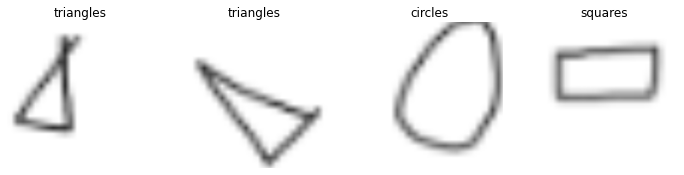

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

**Add-on 3. Squish images**

Using "squish", one can resize the images, if needed.

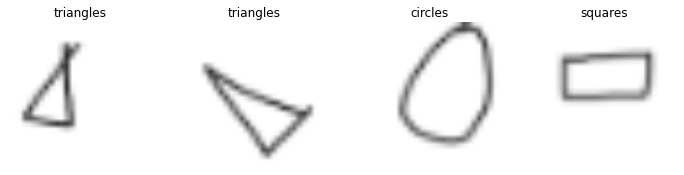

In [ ]:
shapes = shapes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = shapes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

**Add-on 4. Padding images**

It is a well-known concept in CNN of adding pixels to an image when it is being processed by the kernel of a CNN to assist with image processing.

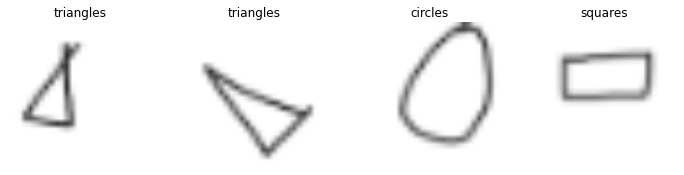

In [ ]:
shapes = shapes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = shapes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

**Add-on 5. Data Augmentation** 

It is the process of extending data in case of fewer data points availability.

In [ ]:
shapes = shapes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = shapes.dataloaders(path)

**Train Model**

Using "fine_tune", a fastai module to fine tune a pretrained model resnet34 using CNN learner on shapes dataset. This is referred to as Transfer Learning in literature.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

**Confusion Matrix**

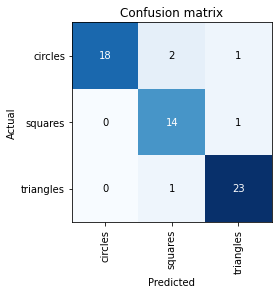

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**Check Losses**

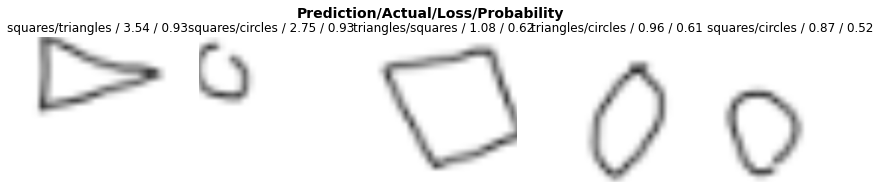

In [ ]:
interp.plot_top_losses(5, nrows=1)

**END**